In [97]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv('train.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5095 non-null   int64 
 1   companyId       5095 non-null   int64 
 2   companyName     5094 non-null   object
 3   description     4845 non-null   object
 4   companyType     5091 non-null   object
 5   employeesCount  5086 non-null   object
 6   timestamp       5095 non-null   object
 7   ICP-conform     5095 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 283.7+ KB


#### EDA (Exploration Data Analysis)

In [176]:
df['ICP-conform'].value_counts(normalize=True)

False    0.633366
True     0.366634
Name: ICP-conform, dtype: float64

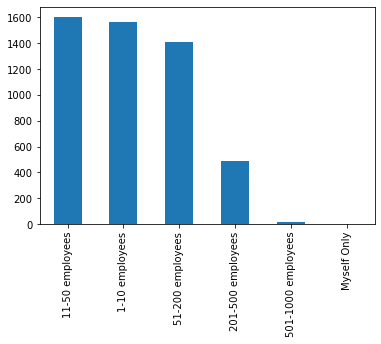

In [177]:
df['employeesCount'].value_counts().plot(kind='bar');

In [178]:
df['companyType'].value_counts()

Apparel & Fashion                       604
Retail                                  591
Food & Beverages                        544
Food Production                         459
Building Materials                      411
                                       ... 
Mental Health Care                        1
Newspapers                                1
Real Estate                               1
Shipbuilding                              1
Recreational Facilities and Services      1
Name: companyType, Length: 97, dtype: int64

In [179]:
df.groupby(['companyType']).agg({'ICP-conform':'mean', 
                                 'companyId':'count'}).reset_index().sort_values(by='companyId', ascending=False)

,companyType,ICP-conform,companyId
1,Apparel & Fashion,0.761589,604
84,Retail,0.494078,591
35,Food & Beverages,0.205882,544
36,Food Production,0.054466,459
8,Building Materials,0.024331,411
...,...,...,...
59,Medical Practice,1.000000,1
60,Mental Health Care,0.000000,1
71,Plastics,1.000000,1
63,Newspapers,0.000000,1


In [180]:
df.groupby(['employeesCount']).agg({'ICP-conform':'mean', 
                                 'companyId':'count'}).reset_index().sort_values(by='companyId', ascending=False)

,employeesCount,ICP-conform,companyId
1,11-50 employees,0.375156,1602
0,1-10 employees,0.537428,1563
4,51-200 employees,0.230715,1413
2,201-500 employees,0.190965,487
3,501-1000 employees,0.200000,20
5,Myself Only,1.000000,1


In [181]:
df['month_num'] = pd.to_datetime(df.timestamp).dt.month
df['month'] = pd.to_datetime(df.timestamp).dt.month_name()
df['day_num'] = pd.to_datetime(df.timestamp).dt.dayofweek
df['day'] = pd.to_datetime(df.timestamp).dt.day_name()
df['hour'] = pd.to_datetime(df.timestamp).dt.hour

In [182]:
df.groupby(['month']).agg({'companyId':'count', 'ICP-conform':'mean'}).reset_index().sort_values(by='companyId', ascending=False)

,month,companyId,ICP-conform
2,March,3199,0.316974
0,April,1652,0.445521
1,February,244,0.483607


In [183]:
df.groupby(['day']).agg({'companyId':'count','ICP-conform':'mean', 
                                 }).reset_index().sort_values(by='companyId', ascending=False)

,day,companyId,ICP-conform
0,Friday,2568,0.260125
1,Monday,1894,0.497888
3,Thursday,244,0.483607
4,Wednesday,233,0.502146
2,Sunday,156,0.141026


### Data Preprocessing

In [184]:
def one_hot_coding(data_frame, columns):
    '''Creating Dummy Columns
    args:
        data_frame : data frame
        columns: list of column names
    return -- dataframe
        '''
    #logging.info("Creating Dummy Varibles")
    for column in columns:
        data_frame = pd.concat([data_frame, pd.get_dummies(data_frame[column],
                                                           prefix=column)], axis=1)
        data_frame.drop(column, inplace=True, axis=1)

    return data_frame

In [185]:
df.columns

Index(['Unnamed: 0', 'companyId', 'companyName', 'description', 'companyType',
       'employeesCount', 'timestamp', 'ICP-conform', 'month_num', 'month',
       'day_num', 'day', 'hour'],
      dtype='object')

In [186]:
df_train = df[['companyType', 'employeesCount', 'day', 'month', 'hour']]

In [187]:
df['ICP-conform'] = df['ICP-conform'].astype('int')

In [188]:
data_frame = one_hot_coding(df_train, ['companyType', 'employeesCount', 'day', 'month', 'hour'])

In [189]:
data_frame

,companyType_Accounting,companyType_Apparel & Fashion,companyType_Architecture & Planning,companyType_Arts and Crafts,companyType_Automotive,companyType_Aviation & Aerospace,companyType_Biotechnology,companyType_Broadcast Media,companyType_Building Materials,companyType_Business Supplies and Equipment,...,day_Thursday,day_Wednesday,month_April,month_February,month_March,hour_9,hour_10,hour_16,hour_21,hour_22
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5091,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5092,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5093,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


###  Model Building

#### Split the train and validation data

In [190]:
df

,Unnamed: 0,companyId,companyName,description,companyType,employeesCount,timestamp,ICP-conform,month_num,month,day_num,day,hour
0,0,10339087,Education Alliance Finland,Education Alliance Finland provides a science-...,E-Learning,1-10 employees,2022-02-24T22:23:17.915Z,0,2,February,3,Thursday,22
1,1,15223233,Videocation.no,Videocation.no AS er et heldigitalt forlag som...,E-Learning,11-50 employees,2022-02-24T22:23:17.915Z,0,2,February,3,Thursday,22
2,2,5012635,Sustainable Brand Index™,Sustainable Brand Index™ measures and analyses...,Market Research,1-10 employees,2022-02-24T22:23:17.915Z,0,2,February,3,Thursday,22
3,3,200335,ArcticStartup,ArcticStartup is an independent technology com...,Internet,11-50 employees,2022-02-24T22:23:17.915Z,0,2,February,3,Thursday,22
4,4,6380562,Organic Basics,We’re building a sustainable brand that people...,Internet,11-50 employees,2022-02-24T22:23:17.915Z,1,2,February,3,Thursday,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,5090,1446271,Anna van Toor,Filosofie\nIn de wereld van Anna van Toor…\n… ...,Textiles,201-500 employees,2022-04-20T16:31:16.988Z,0,4,April,2,Wednesday,16
5091,5091,19205242,VEBE,"VEBE, member of the Condor Group, has over 75 ...",Textiles,501-1000 employees,2022-04-20T16:31:16.988Z,0,4,April,2,Wednesday,16
5092,5092,1666283,Profimex Bedrijfskleding,Profimex is a professional supplier of work we...,Textiles,11-50 employees,2022-04-20T16:31:16.988Z,0,4,April,2,Wednesday,16
5093,5093,1456342,Lienesch bv,As a producer of window decoration fabrics we ...,Textiles,51-200 employees,2022-04-20T16:31:16.988Z,0,4,April,2,Wednesday,16


In [191]:
df_train = df[['companyType', 'employeesCount', 'day', 'month', 'hour', 'ICP-conform']]
train, test = train_test_split(df_train,test_size=0.2,random_state = 42)

In [192]:
train = df[['companyType', 'employeesCount', 'day', 'month', 'hour', 'ICP-conform']]
data_frame = one_hot_coding(train, ['companyType', 'employeesCount', 'day', 'month', 'hour'])
x = data_frame.drop(columns='ICP-conform')
y = data_frame['ICP-conform'] 

In [193]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)


#### Simple Logistic Regression model

Logistic Regression Classification Test Accuracy 0.719332679097154


/Users/Kiran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


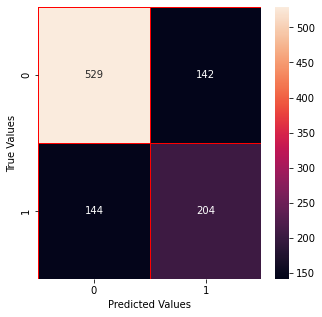

In [194]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [195]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 200 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4
VALID_SIZE = 0.2
#We also use random state for reproducibility
RANDOM_STATE = 42


In [196]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=42,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [197]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=4, random_state=42,
                       verbose=False)

In [199]:
preds = clf.predict(x_test)

### Model Inference

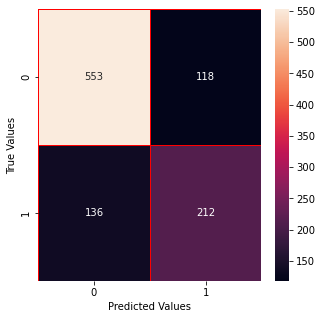

In [200]:
y_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [201]:
from sklearn.metrics import classification_report

In [202]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       671
           1       0.64      0.61      0.63       348

    accuracy                           0.75      1019
   macro avg       0.72      0.72      0.72      1019
weighted avg       0.75      0.75      0.75      1019



In [203]:
def plot_feature_importance(top_n_features=10):
    tmp = pd.DataFrame({'Feature': x_train.columns, 'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)[:top_n_features]
    plt.figure(figsize = (7,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()   

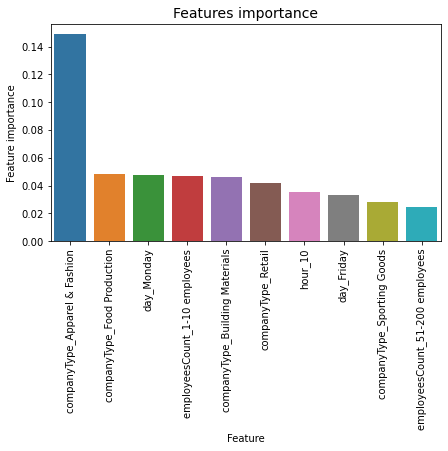

In [204]:
plot_feature_importance()